# Darstellung als Ganzzahl


int16


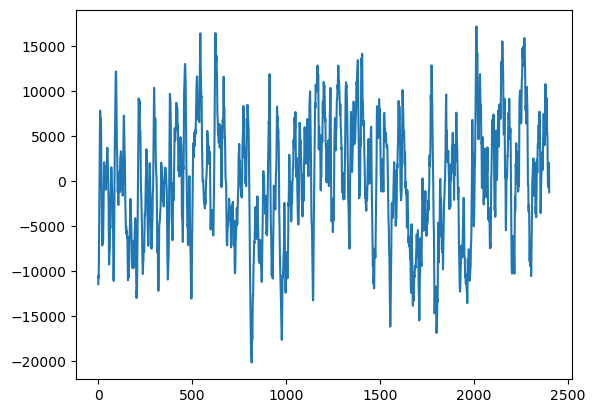

<Figure size 21600x1080 with 0 Axes>

In [1]:
import scipy.io.wavfile as wav
import processing as ps


original_sample_rate, data  = wav.read("C:/Users/felix/Music/lavenders.wav")
mono = ps.stereo_to_mono(data)

frame_step = int(original_sample_rate / 50) # 50 Frames pro Sekunde
frame_length = int(frame_step * 2.5)

frames = ps.samples_to_frames(
    data=mono,
    frame_length=frame_length,
    frane_step=frame_step
)

int_frame = frames[803]

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.plot(int_frame)
figure(figsize=(20, 1), dpi=1080)

print(mono.dtype)


# Darstellung als Fließkommazahl

float64
Max:  0.999969482421875


<Figure size 21600x1080 with 0 Axes>

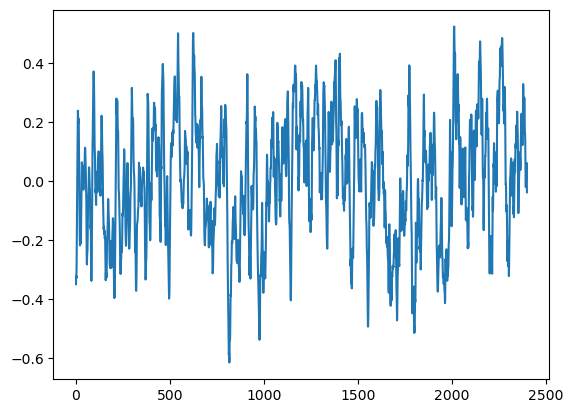

<Figure size 21600x1080 with 0 Axes>

In [2]:
float_frame = int_frame / 2 ** 15
float_data = mono / 2 ** 15

print(float_frame.dtype)
plt.plot(float_frame)
print("Max: ", max(float_data))
figure(figsize=(20, 1), dpi=1080)


# Pre-Emphasis Filter auf das Signal

Bei dem oberen Bild haben tiefere Frequenzen viel höhere Amplituden als höhere Signale. Dies hat zu Folge, dass später nach der Fourier Transformation, keine großen Unterschiede bei den höheren Frequenzen mehr wargenommen werden können, da die Tiefen viel zu "kräftig" sind.

Mit einem kleinen Tiefpassfilter können die hohen Schwankungen des oberen Signals wieder normalisiert werden.


<Figure size 21600x1080 with 0 Axes>

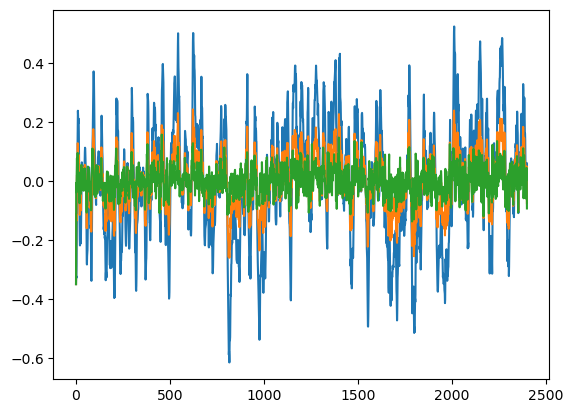

<Figure size 21600x1080 with 0 Axes>

In [3]:
import numpy as np

x = float_frame
new_signal = np.append(x[0], x[1:] - 0.6 * x[:-1])
new_signal2 = np.append(x[0], x[1:] - 0.9 * x[:-1])

#or
#h = np.empty(shape=2, dtype=np.float32)
##h[0] = 1
#h[1] = -0.9
#new_signal2 = np.convolve(x, h)

plt.plot(float_frame)
plt.plot(new_signal)
plt.plot(new_signal2)
figure(figsize=(20, 1), dpi=1080)